In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install split-folders

In [5]:
# split data into train, validation, and test
import splitfolders

In [6]:
splitfolders.ratio("/content/drive/MyDrive/coco128/coco128/images", output="images_data", seed=12, ratio=(0.8, 0.1,0.1), move=True) # train: 0.8, val: 0.1, test: 0.1

Copying files: 128 files [00:02, 50.18 files/s] 


In [7]:
splitfolders.ratio("/content/drive/MyDrive/coco128/coco128/labels", output="labels_data", seed=12, ratio=(0.8, 0.1,0.1), move=True) # train: 0.8, val: 0.1, test: 0.1

Copying files: 128 files [00:02, 52.40 files/s] 


In [ ]:
# note: the folders from the labels split must be moved and made as sibling folders to the images split for training to work properly

In [15]:
# make yaml file for data
with open('data.yaml', 'w') as f:
    f.write('train: /content/images_data/train/images\n')
    f.write('val: /content/images_data/val/images\n')
    f.write('test: /content/images_data/test/images\n')
    f.write('nc: 80\n')
    f.write("names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']")

In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 28.2 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# import model
model = YOLO("yolov5n.pt")

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 90.8MB/s]


In [17]:
# train model
results = model.train(data="/content/data.yaml", epochs=30, val = True, pretrained = True, optimizer = "auto", patience = 0, save = True, project="object_detection", name="yolov5n")

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/data.yaml, epochs=30, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=object_detection, name=yolov5n5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning /content/images_data/train/labels.cache... 84 images, 18 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/images_data/val/labels.cache... 3 images, 9 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to object_detection/yolov5n5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to object_detection/yolov5n5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.75G      1.288      1.747      1.298         85        640: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         12         13      0.792      0.719      0.842      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.79G      1.178      1.483      1.239         29        640: 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         12         13      0.769      0.722      0.843      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       3.8G       1.21      1.495      1.242         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         12         13      0.733      0.793      0.842      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.53G      1.329      1.576      1.273         80        640: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         12         13      0.713      0.778      0.823      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.68G      1.293       1.47      1.281         51        640: 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         12         13      0.662      0.778      0.807      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.84G      1.305      1.477      1.247        100        640: 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         12         13      0.629      0.746      0.785      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       3.6G      1.266      1.472      1.272         78        640: 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         12         13      0.635      0.748      0.813       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.65G      1.277      1.407      1.287         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]


                   all         12         13      0.657       0.74      0.892       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.55G      1.268      1.391      1.234         43        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


                   all         12         13      0.646      0.747      0.891      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.58G      1.247      1.377      1.236         80        640: 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         12         13      0.697      0.751      0.891      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.51G      1.201      1.303      1.232        154        640: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         12         13      0.633      0.764      0.894      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.62G      1.219      1.401      1.239         63        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         12         13      0.678      0.771      0.891      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       3.5G      1.188      1.299      1.236         95        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         12         13      0.673       0.77      0.894      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.61G      1.224       1.36       1.25         88        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]


                   all         12         13      0.573      0.722      0.887      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.63G      1.176      1.277      1.203         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         12         13       0.57      0.722      0.881      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.69G      1.157      1.323       1.21         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         12         13      0.563      0.722      0.848      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.73G      1.155      1.281      1.214         49        640: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         12         13      0.561      0.722       0.85      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.62G      1.237      1.288       1.22         72        640: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         12         13      0.552      0.751      0.859      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.61G      1.181      1.246      1.205         92        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]


                   all         12         13      0.558      0.778      0.834      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.59G      1.175      1.244      1.202         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all         12         13      0.525      0.722      0.831      0.728


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.56G       1.22      1.394      1.197         18        640: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         12         13      0.522      0.722      0.821      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       3.5G      1.227      1.257      1.178         40        640: 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         12         13      0.523      0.722       0.82      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       3.5G      1.162      1.238      1.165         56        640: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         12         13      0.812        0.5      0.809      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.41G      1.208      1.283      1.177         27        640: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


                   all         12         13      0.811        0.5      0.708      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.49G      1.201      1.361      1.216         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         12         13      0.808        0.5      0.703       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.44G      1.164      1.195      1.142         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         12         13      0.814        0.5       0.74       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.55G      1.203      1.206      1.206         33        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         12         13      0.744      0.598      0.758      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       3.5G      1.176      1.153      1.179         37        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         12         13      0.875        0.5      0.757      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.44G      1.123      1.162      1.163         36        640: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         12         13      0.897      0.512      0.785      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.47G      1.126      1.121      1.121         21        640: 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         12         13      0.878        0.5      0.761       0.63



30 epochs completed in 0.028 hours.
Optimizer stripped from object_detection/yolov5n5/weights/last.pt, 5.6MB
Optimizer stripped from object_detection/yolov5n5/weights/best.pt, 5.6MB

Validating object_detection/yolov5n5/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2,649,200 parameters, 0 gradients, 7.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]


                   all         12         13      0.675      0.769      0.894      0.772
                   car          1          1      0.449          1      0.995      0.995
                   cat          1          1          1          1      0.995      0.995
               giraffe          1          3      0.585      0.948      0.753      0.469
                  bowl          1          3      0.415      0.667      0.806      0.702
                orange          1          4          1          0      0.822      0.577
              broccoli          1          1      0.601          1      0.995      0.895
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to object_detection/yolov5n5


In [18]:
from google.colab import files

In [19]:
files.download('object_detection/yolov5n5/weights/best.pt') # download best trained model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# get best model and the metrics from training
best_model = YOLO('object_detection/yolov5n5/weights/best.pt')
metrics = model.val()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2,649,200 parameters, 0 gradients, 7.7 GFLOPs


val: Scanning /content/images_data/val/labels.cache... 3 images, 9 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


                   all         12         13      0.673       0.77      0.891      0.771
                   car          1          1      0.446          1      0.995      0.995
                   cat          1          1          1          1      0.995      0.995
               giraffe          1          3      0.586      0.953      0.753      0.469
                  bowl          1          3      0.406      0.667      0.789      0.691
                orange          1          4          1          0      0.822      0.577
              broccoli          1          1      0.598          1      0.995      0.895
Speed: 0.3ms preprocess, 16.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to object_detection/yolov5n52


In [21]:
metrics.box.map50

0.8914455128205128

In [22]:
metrics.box.map75

0.8599218286099864

In [23]:
metrics.box.maps

array([    0.77051,     0.77051,       0.995,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,       0.995,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.46936,
           0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.69116,     0.77051,     0.77051,
           0.77051,     0.57703,      0.8955,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,     0.77051,
           0.77051,     0.77051,     0.7705

In [24]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [36]:
test_path = '/content/images_data/test/images'
test_list = os.listdir(test_path)
random_test_img = random.sample(test_list, 6)

In [34]:
def show_image(img_path, model):
    img = cv2.imread(img_path)
    result = model(img)
    res_img = result[0].plot()
    res_img = cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB)
    return res_img


0: 448x640 1 person, 3 knifes, 1 microwave, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 potted plant, 1 sink, 12.5ms
Speed: 3.2ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 1 bottle, 1 wine glass, 1 cup, 1 pizza, 1 dining table, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 giraffe, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 1 car, 1 bus, 1 handbag, 2 suitcases, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 2 clocks, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


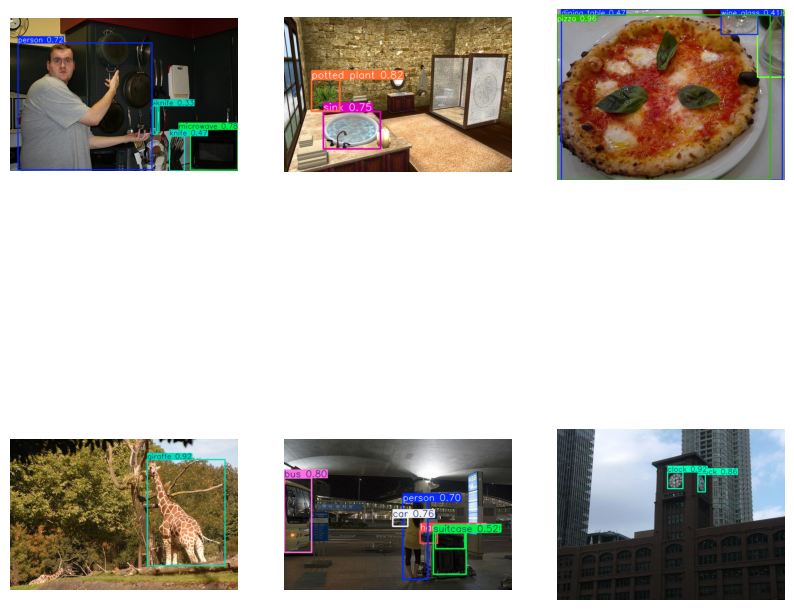

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

for index, image_file in enumerate(random_test_img):

    row_index = index // 3
    col_index = index % 3

    img_path = os.path.join(test_path, image_file)
    detect_img = show_image(img_path, best_model)

    axes[row_index, col_index].imshow(detect_img)
    axes[row_index, col_index].axis('off')